# Simple example of integrating the Rubidium wavefunction

In [ ]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from ryd_numerov.rydberg import RydbergState

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
logging.getLogger("ryd_numerov").setLevel(logging.DEBUG)

In [ ]:
species = "Rb"
n = 130
l = n - 1
j = l + 0.5

In [ ]:
atom = RydbergState(species, n=n, l=l, j=j)
atom.integrate_wavefunction()

DEBUG database.py: No model potential parameters found for Rb with l=129, trying largest l
DEBUG database.py: No Rydberg-Ritz parameters found for Rb with l=129 and j=129, returning parameters with d_i=0


In [ ]:
hydrogen = RydbergState("H", n=atom.n, l=atom.l, j=atom.j if atom.is_alkali else atom.j + 1 / 2)
hydrogen.create_model(add_spin_orbit=False)
hydrogen.integrate_wavefunction()

DEBUG database.py: No model potential parameters found for H with l=129, trying largest l
DEBUG database.py: No Rydberg-Ritz parameters found for H with l=129 and j=129, returning parameters with d_i=0


WARNING model.py: Turning point is at arg=0, this shouldnt happen.


turning points:  {'hydrogen': 119.74680359630905, 'classical': 124.16880359637791, 'zerocrossing': 109.74680359630905}


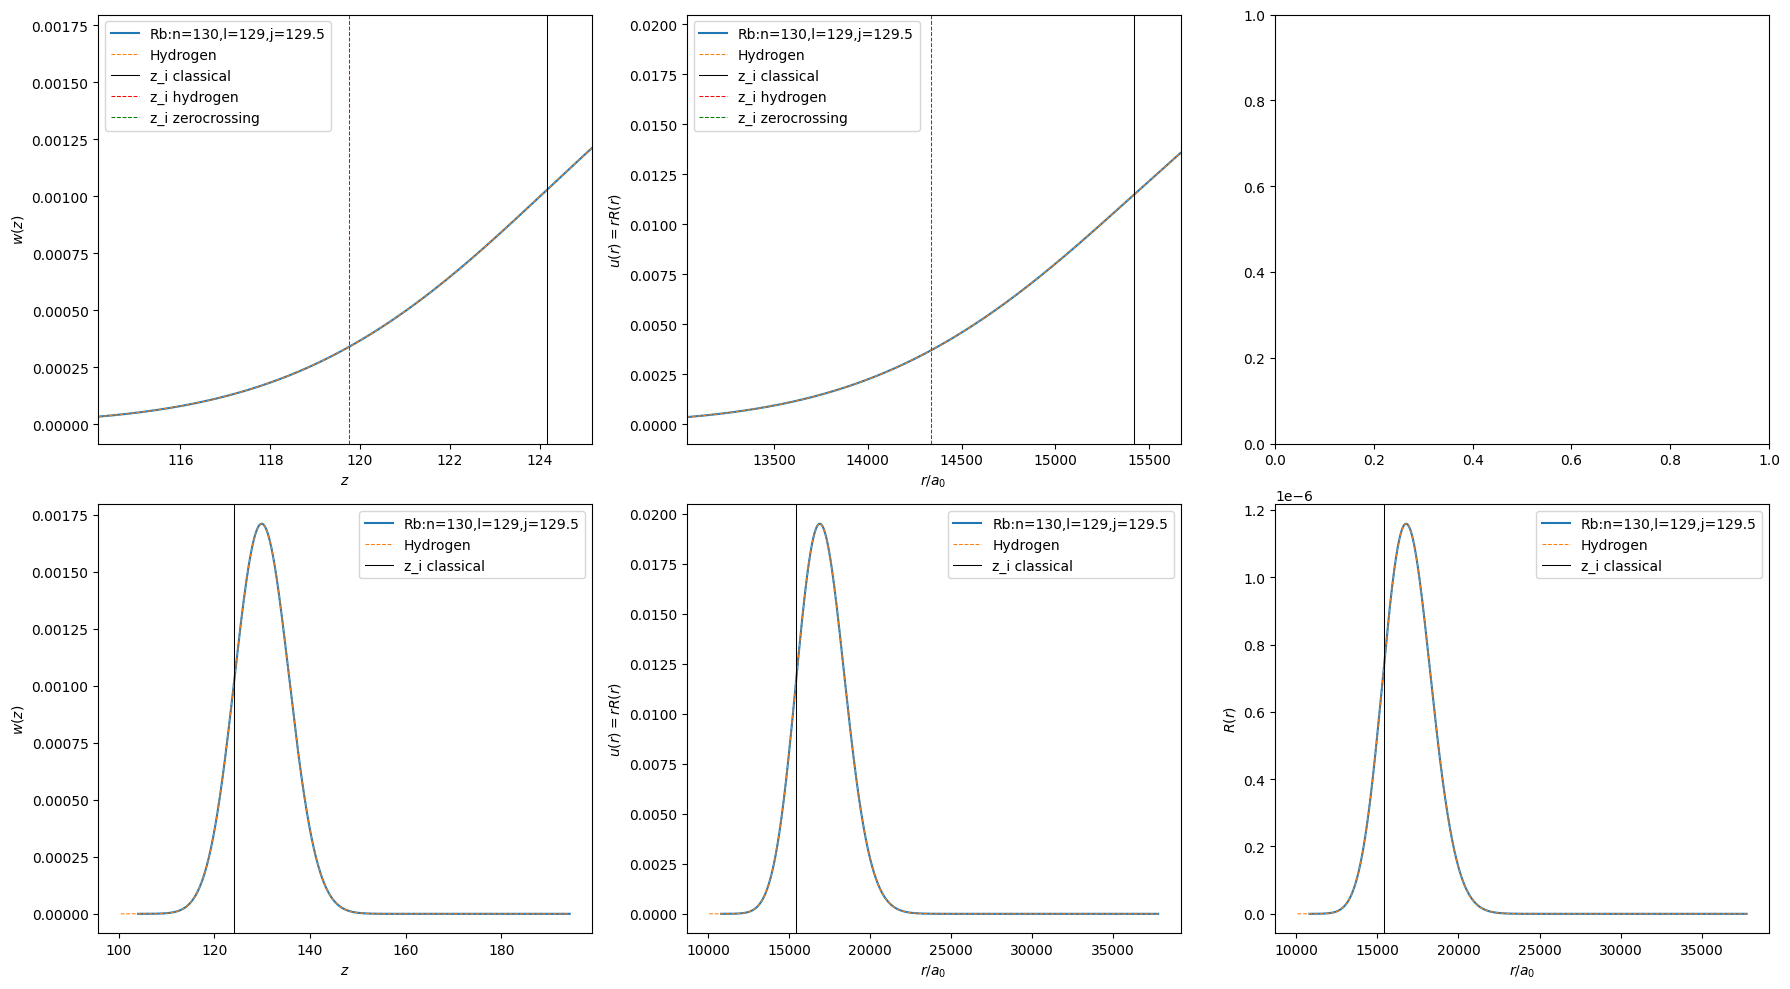

In [ ]:
label = f"{atom.species}:n={atom.n},l={atom.l},j={atom.j}"
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
z_i = {which: atom.model.calc_z_turning_point(which, dz=1e-3) for which in ["hydrogen", "classical", "zerocrossing"]}
print("turning points: ", z_i)

axs[0, 0].plot(atom.grid.z_list, atom.wavefunction.w_list, "C0-", label=label)
axs[0, 0].plot(hydrogen.grid.z_list, hydrogen.wavefunction.w_list, "C1--", lw=0.75, label="Hydrogen")
axs[0, 0].axvline(z_i["classical"], color="k", ls="-", lw=0.75, label="z_i classical")
axs[0, 0].axvline(z_i["hydrogen"], color="red", ls="--", lw=0.75, label="z_i hydrogen")
axs[0, 0].axvline(z_i["zerocrossing"], color="green", ls="--", lw=0.75, label="z_i zerocrossing")
axs[0, 0].set_xlabel(r"$z$")
axs[0, 0].set_ylabel(r"$w(z)$")
axs[0, 0].legend()
z_min, z_max = max(0, z_i["classical"] - 10), z_i["classical"] + 1
axs[0, 0].set_xlim(z_min, z_max)

axs[0, 1].plot(atom.grid.x_list, atom.wavefunction.u_list, "C0-", label=label)
axs[0, 1].plot(hydrogen.grid.x_list, hydrogen.wavefunction.u_list, "C1--", lw=0.75, label="Hydrogen")
axs[0, 1].axvline(z_i["classical"] ** 2, color="k", ls="-", lw=0.75, label="z_i classical")
axs[0, 1].axvline(z_i["hydrogen"] ** 2, color="red", ls="--", lw=0.75, label="z_i hydrogen")
axs[0, 1].axvline(z_i["zerocrossing"] ** 2, color="green", ls="--", lw=0.75, label="z_i zerocrossing")
axs[0, 1].set_xlabel(r"$r / a_0$")
axs[0, 1].set_ylabel(r"$u(r) = r R(r)$")
axs[0, 1].legend()
axs[0, 1].set_xlim(z_min**2, z_max**2)

axs[1, 0].plot(atom.grid.z_list, atom.wavefunction.w_list, "C0-", label=label)
axs[1, 0].plot(hydrogen.grid.z_list, hydrogen.wavefunction.w_list, "C1--", lw=0.75, label="Hydrogen")
axs[1, 0].axvline(z_i["classical"], color="k", ls="-", lw=0.75, label="z_i classical")
axs[1, 0].set_xlabel(r"$z$")
axs[1, 0].set_ylabel(r"$w(z)$")
axs[1, 0].legend()

axs[1, 1].plot(atom.grid.x_list, atom.wavefunction.u_list, "C0-", label=label)
axs[1, 1].plot(hydrogen.grid.x_list, hydrogen.wavefunction.u_list, "C1--", lw=0.75, label="Hydrogen")
axs[1, 1].axvline(z_i["classical"] ** 2, color="k", ls="-", lw=0.75, label="z_i classical")
axs[1, 1].set_xlabel(r"$r / a_0$")
axs[1, 1].set_ylabel(r"$u(r) = r R(r)$")
axs[1, 1].legend()

axs[1, 2].plot(atom.grid.x_list, atom.wavefunction.r_list, "C0-", label=label)
axs[1, 2].plot(hydrogen.grid.x_list, hydrogen.wavefunction.r_list, "C1--", lw=0.75, label="Hydrogen")
axs[1, 2].axvline(z_i["classical"] ** 2, color="k", ls="-", lw=0.75, label="z_i classical")
axs[1, 2].set_xlabel(r"$r / a_0$")
axs[1, 2].set_ylabel(r"$R(r)$")
axs[1, 2].legend()

fig.tight_layout()
plt.show()

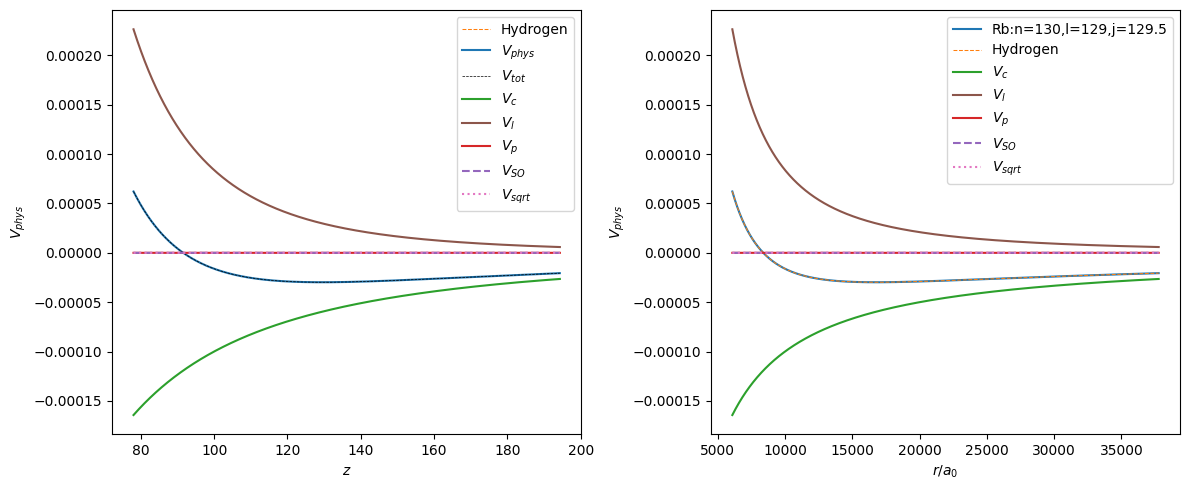

Rb energy: -2.9585607212803095e-05
Hydrogen energy: -2.9585798816568047e-05


In [ ]:
plot_all_potentials = True

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
new_z_list = np.linspace(0.75 * np.sqrt(atom.grid.x_min), np.sqrt(atom.grid.x_max), 10_000)
new_x_list = np.power(new_z_list, 2)
atom_v_phys = atom.model.calc_total_physical_potential(new_x_list)
hydrogen_v_phys = hydrogen.model.calc_total_physical_potential(new_x_list)

axs[0].plot(new_z_list, hydrogen_v_phys, "C1--", lw=0.75, label="Hydrogen")

axs[0].plot(new_z_list, atom.model.calc_total_physical_potential(new_x_list), "C0-", label=r"$V_{phys}$")
axs[0].plot(new_z_list, atom.model.calc_total_effective_potential(new_x_list), "k--", lw=0.5, label=r"$V_{tot}$")
if plot_all_potentials:
    axs[0].plot(new_z_list, atom.model.calc_potential_core(new_x_list), "C2-", label=r"$V_c$")
    axs[0].plot(new_z_list, atom.model.calc_potential_centrifugal(new_x_list), "C5-", label=r"$V_l$")
    axs[0].plot(new_z_list, atom.model.calc_potential_core_polarization(new_x_list), "C3-", label=r"$V_p$")
    axs[0].plot(new_z_list, atom.model.calc_potential_spin_orbit(new_x_list), "C4--", label=r"$V_{SO}$")
    axs[0].plot(new_z_list, atom.model.calc_effective_potential_sqrt(new_x_list), "C6:", label=r"$V_{sqrt}$")

axs[0].axvline(z_i["classical"], color="k", ls="-", lw=0.75, label="z_i classical")
axs[0].set_xlabel(r"$z$")
axs[0].set_ylabel(r"$V_{phys}$")
axs[0].legend()

axs[1].plot(new_x_list, atom_v_phys, "C0-", label=label)
axs[1].plot(new_x_list, hydrogen_v_phys, "C1--", lw=0.75, label="Hydrogen")

if plot_all_potentials:
    axs[1].plot(new_x_list, atom.model.calc_potential_core(new_x_list), "C2-", label=r"$V_c$")
    axs[1].plot(new_x_list, atom.model.calc_potential_centrifugal(new_x_list), "C5-", label=r"$V_l$")
    axs[1].plot(new_x_list, atom.model.calc_potential_core_polarization(new_x_list), "C3-", label=r"$V_p$")
    axs[1].plot(new_x_list, atom.model.calc_potential_spin_orbit(new_x_list), "C4--", label=r"$V_{SO}$")
    axs[1].plot(new_x_list, atom.model.calc_effective_potential_sqrt(new_x_list), "C6:", label=r"$V_{sqrt}$")

axs[1].axvline(z_i["classical"] ** 2, color="k", ls="-", lw=0.75, label="z_i classical")
axs[1].set_xlabel(r"$r / a_0$")
axs[1].set_ylabel(r"$V_{phys}$")
axs[1].legend()


for ax in axs:
    if ax.get_ylim()[0] < -1:
        ax.set_ylim(-1)
    if ax.get_ylim()[1] > 1:
        ax.set_ylim(None, 1)

fig.tight_layout()
plt.show()

print(f"{atom.species} energy: {atom.energy}")
print(f"Hydrogen energy: {hydrogen.energy}")

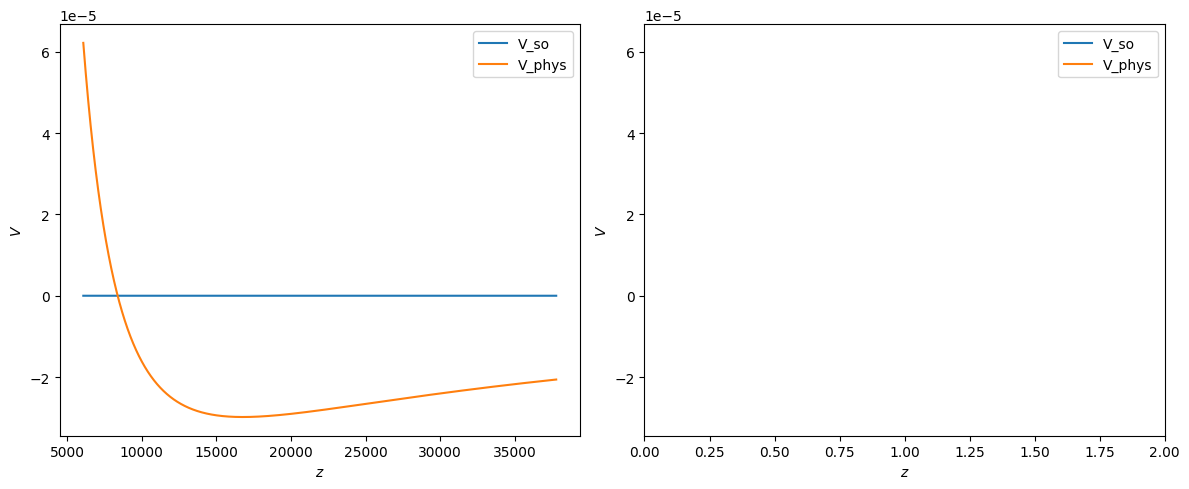

Rb energy: -2.9585607212803095e-05
Hydrogen energy: -2.9585798816568047e-05


In [ ]:
plot_potentials = ["V_so", "V_phys"]

z_list = np.linspace(0.75 * np.sqrt(atom.grid.x_min), np.sqrt(atom.grid.x_max), 10_000)
x_list = np.power(z_list, 2)

potentials = {
    "V_so": atom.model.calc_potential_spin_orbit(x_list),
    "V_phys": atom.model.calc_total_physical_potential(x_list),
}

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for k, v in potentials.items():
    for ax in axs:
        ax.plot(x_list, v, label=k)

        ax.set_xlabel(r"$z$")
        ax.set_ylabel(r"$V$")
        ax.legend()

axs[1].set_xlim(0, 2)


for ax in axs:
    if ax.get_ylim()[0] < -0.1:
        ax.set_ylim(-0.1)
    if ax.get_ylim()[1] > 0.1:
        ax.set_ylim(None, 0.1)

fig.tight_layout()
plt.show()

print(f"{atom.species} energy: {atom.energy}")
print(f"Hydrogen energy: {hydrogen.energy}")

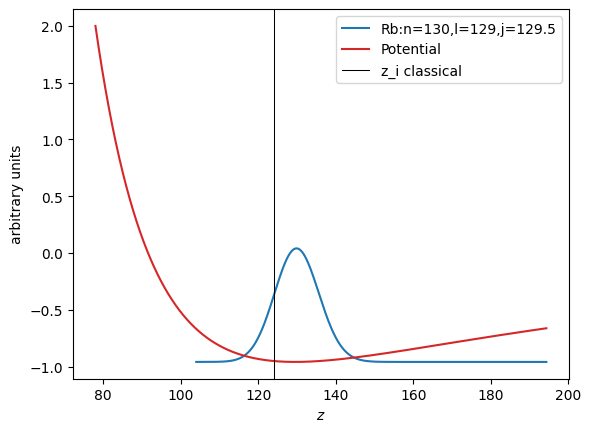

In [ ]:
scaled_w_list = atom.wavefunction.w_list / np.max(np.abs(atom.wavefunction.w_list))
scaled_v_phys = 2 * atom_v_phys / np.max(np.abs(atom_v_phys))

fig, ax = plt.subplots()

ax.plot(atom.grid.z_list, scaled_w_list + np.min(scaled_v_phys), "C0-", label=label)
ax.plot(new_z_list, scaled_v_phys, "C3-", label="Potential")
ax.set_xlabel(r"$z$")
ax.set_ylabel("arbitrary units")

ax.axvline(z_i["classical"], color="k", ls="-", lw=0.75, label="z_i classical")
ax.legend()
plt.show()